# Leitura dos dados

In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ml-espm/master/data/madelon_train.data"
s=requests.get(url).content
madelon_data =pd.read_csv(io.StringIO(s.decode('utf-8')), sep=" ", header=None)

In [2]:
madelon_data = madelon_data.loc[:,0:499]
print(madelon_data.shape)
madelon_data.head()

(2000, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [3]:
url="https://raw.githubusercontent.com/fbarth/ml-espm/master/data/madelon_train.labels"
s=requests.get(url).content
madelon_label = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=" ", header=None)

In [4]:
madelon_label.shape
madelon_label = madelon_label.rename(columns = {0: 'label'})
madelon_label['label'].value_counts()

 1    1000
-1    1000
Name: label, dtype: int64

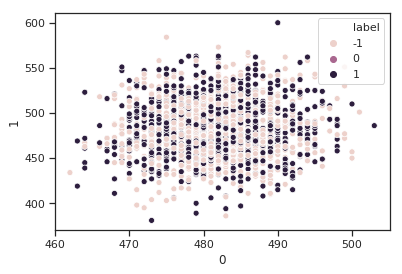

In [5]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
sns.scatterplot(x=0, y=1,hue=madelon_label['label'],data=madelon_data)

# Divisão dos dados

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(madelon_data, madelon_label['label'], test_size=0.2, random_state=4)

# Execução de um modelo baseline

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [8]:
predicted = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))
from sklearn.metrics import accuracy_score
accr = accuracy_score(y_test, predicted)
print(accr)

[[136  58]
 [ 53 153]]
0.7225


# Execução de uma Random Forest com parâmetros aleatórios

In [9]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=True)
clf = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=4, oob_score=True, max_features=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=4, verbose=0, warm_start=False)

In [10]:
predicted = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))
from sklearn.metrics import accuracy_score
accr = accuracy_score(y_test, predicted)
print(accr)

[[152  42]
 [ 42 164]]
0.79


# Random Forest com GridSearch

In [11]:
%%time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['log2', 'sqrt', 50, 100, 200, 300],
    'max_depth' : [5,10,50,100,150,None]
}
rfc=RandomForestClassifier(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=4)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   44.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 25.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 71.6min


KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=4, max_features=100, n_estimators= 1000, max_depth=None)
rfc1.fit(X_train, y_train)

In [ ]:
predicted = rfc1.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))
from sklearn.metrics import accuracy_score
accr = accuracy_score(y_test, predicted)
print(accr)

# Random Forest com Random Search CV

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['log2', 'sqrt', 50, 100, 200, 300],
    'max_depth' : [5,10,50,100,150,None]
}
rfc=RandomForestClassifier(random_state=4)
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions = param_grid, cv= 3, verbose=1, n_jobs=-1, n_iter=10)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc2=RandomForestClassifier(random_state=4, max_features=200, n_estimators= 600, max_depth=None)
rfc2.fit(X_train, y_train)

In [ ]:
predicted = rfc2.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))
from sklearn.metrics import accuracy_score
accr = accuracy_score(y_test, predicted)
print(accr)